In [1]:
import pandas as pd
import gzip
import json


In [2]:
# reads a gzip-compressed file line by line and returns each line as a JSON object
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

In [3]:
test = parse('AMAZON_FASHION.json.gz')

In [4]:
# Extract level 0 data
reviews = pd.json_normalize(test)
# Remove blank spaces and non-alphabetic characters from column names
reviews.columns = reviews.columns.str.replace(r'\W+', '', regex=True)
reviews.columns = reviews.columns.str.lower()
pd.set_option('display.max_columns', None)
print(reviews)

        overall  verified   reviewtime      reviewerid        asin   
0           5.0      True  10 20, 2014  A1D4G1SNUZWQOT  7106116521  \
1           2.0      True  09 28, 2014  A3DDWDH9PX2YX2  7106116521   
2           4.0     False  08 25, 2014  A2MWC41EW7XL15  7106116521   
3           2.0      True  08 24, 2014  A2UH2QQ275NV45  7106116521   
4           3.0     False  07 27, 2014   A89F3LQADZBS5  7106116521   
...         ...       ...          ...             ...         ...   
883631      5.0      True  02 21, 2017  A1ZSB2Q144UTEY  B01HJHTH5U   
883632      5.0      True  11 25, 2016  A2CCDV0J5VB6F2  B01HJHTH5U   
883633      3.0      True  11 10, 2016  A3O90PACS7B61K  B01HJHTH5U   
883634      3.0      True  11 10, 2016  A2HO94I89U3LNH  B01HJHF97K   
883635      5.0      True   08 9, 2016  A2RSX9E79DUHRX  B01HJG5NMW   

               reviewername   
0                     Tracy  \
1                 Sonja Lau   
2                  Kathleen   
3               Jodi Stoner   
4   

In [5]:
# Inspecting the data , Check for any nulls values
reviews.isnull().sum()  
# Inspecting some of the reviews
# https://www.kaggle.com/code/currie32/summarizing-text-with-amazon-reviews
for i in range(5):
    print("Review #",i+1)
    print(reviews.summary[i])
    print(reviews.reviewtext[i])
    print()

Review # 1
perfect replacements!!
Exactly what I needed.

Review # 2
I agree with the other review, the opening is ...
I agree with the other review, the opening is too small.  I almost bent the hook on some very expensive earrings trying to get these up higher than just the end so they're not seen.  Would not buy again but for the price, not sending back.

Review # 3
My New 'Friends' !!
Love these... I am going to order another pack to keep in work; someone (including myself) is always losing the back to an earring.  I don't understand why all fish hook earrings don't have them.  Just wish that they were a tiny bit longer.  :)

Review # 4
Two Stars
too tiny an opening

Review # 5
Three Stars
Okay



In [6]:
reviews.describe()

,overall,unixreviewtime
count,883636.00000,8.836360e+05
mean,3.90694,1.456751e+09
std,1.41828,4.430691e+07
min,1.00000,1.036973e+09
25%,3.00000,1.434240e+09
50%,5.00000,1.462234e+09
75%,5.00000,1.484266e+09
max,5.00000,1.538352e+09


In [7]:
# Convert unixreviewtime to datetime
reviews['unix_review_time'] = pd.to_datetime(reviews['unixreviewtime'], unit='s')

In [8]:
reviews.head()

,overall,verified,reviewtime,reviewerid,asin,reviewername,reviewtext,summary,unixreviewtime,vote,stylecolor,stylesize,image,stylemetaltype,stylesizename,stylestyle,stylelength,styleteamname,stylestylename,styleformat,stylepackagequantity,stylematerial,styleitemdisplaylength,stylegemtype,styleitempackagequantity,stylescentname,styleshape,unix_review_time
0,5.0,True,"10 20, 2014",A1D4G1SNUZWQOT,7106116521,Tracy,Exactly what I needed.,perfect replacements!!,1413763200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-10-20
1,2.0,True,"09 28, 2014",A3DDWDH9PX2YX2,7106116521,Sonja Lau,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",1411862400,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-09-28
2,4.0,False,"08 25, 2014",A2MWC41EW7XL15,7106116521,Kathleen,Love these... I am going to order another pack...,My New 'Friends' !!,1408924800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-25
3,2.0,True,"08 24, 2014",A2UH2QQ275NV45,7106116521,Jodi Stoner,too tiny an opening,Two Stars,1408838400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-24
4,3.0,False,"07 27, 2014",A89F3LQADZBS5,7106116521,Alexander D.,Okay,Three Stars,1406419200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-07-27


In [9]:
#Checking the number of columns in the data set
reviews.columns

Index(['overall', 'verified', 'reviewtime', 'reviewerid', 'asin',
       'reviewername', 'reviewtext', 'summary', 'unixreviewtime', 'vote',
       'stylecolor', 'stylesize', 'image', 'stylemetaltype', 'stylesizename',
       'stylestyle', 'stylelength', 'styleteamname', 'stylestylename',
       'styleformat', 'stylepackagequantity', 'stylematerial',
       'styleitemdisplaylength', 'stylegemtype', 'styleitempackagequantity',
       'stylescentname', 'styleshape', 'unix_review_time'],
      dtype='object')

In [10]:
#Types of data set
reviews.dtypes

overall                            float64
verified                              bool
reviewtime                          object
reviewerid                          object
asin                                object
reviewername                        object
reviewtext                          object
summary                             object
unixreviewtime                       int64
vote                                object
stylecolor                          object
stylesize                           object
image                               object
stylemetaltype                      object
stylesizename                       object
stylestyle                          object
stylelength                         object
styleteamname                       object
stylestylename                      object
styleformat                         object
stylepackagequantity                object
stylematerial                       object
styleitemdisplaylength              object
stylegemtyp

In [11]:
#Percentage of missing values in each coulmn

missing_percentage = (reviews.isna().sum() / len(reviews)) * 100
print(missing_percentage)

overall                      0.000000
verified                     0.000000
reviewtime                   0.000000
reviewerid                   0.000000
asin                         0.000000
reviewername                 0.010412
reviewtext                   0.139537
summary                      0.060319
unixreviewtime               0.000000
vote                        90.957815
stylecolor                  70.313681
stylesize                   74.594516
image                       96.739947
stylemetaltype              99.810442
stylesizename               99.553889
stylestyle                  98.681810
stylelength                 99.838735
styleteamname               99.977593
stylestylename              99.978951
styleformat                 99.990267
stylepackagequantity        99.994568
stylematerial               99.999547
styleitemdisplaylength      99.999547
stylegemtype                99.996492
styleitempackagequantity    99.998642
stylescentname              99.999208
styleshape  

In [12]:
# Set your threshold for missing values percentage
threshold_percentage = 89
# Calculate the threshold count
threshold_count = len(reviews) * (threshold_percentage / 100)
# Drop columns exceeding the threshold
reviews = reviews.dropna(axis=1, thresh=threshold_count)

In [13]:
reviews

,overall,verified,reviewtime,reviewerid,asin,reviewername,reviewtext,summary,unixreviewtime,unix_review_time
0,5.0,True,"10 20, 2014",A1D4G1SNUZWQOT,7106116521,Tracy,Exactly what I needed.,perfect replacements!!,1413763200,2014-10-20
1,2.0,True,"09 28, 2014",A3DDWDH9PX2YX2,7106116521,Sonja Lau,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",1411862400,2014-09-28
2,4.0,False,"08 25, 2014",A2MWC41EW7XL15,7106116521,Kathleen,Love these... I am going to order another pack...,My New 'Friends' !!,1408924800,2014-08-25
3,2.0,True,"08 24, 2014",A2UH2QQ275NV45,7106116521,Jodi Stoner,too tiny an opening,Two Stars,1408838400,2014-08-24
4,3.0,False,"07 27, 2014",A89F3LQADZBS5,7106116521,Alexander D.,Okay,Three Stars,1406419200,2014-07-27
...,...,...,...,...,...,...,...,...,...,...
883631,5.0,True,"02 21, 2017",A1ZSB2Q144UTEY,B01HJHTH5U,Amazon Customer,I absolutely love this dress!! It's sexy and ...,I absolutely love this dress,1487635200,2017-02-21
883632,5.0,True,"11 25, 2016",A2CCDV0J5VB6F2,B01HJHTH5U,Amazon Customer,I'm 5'6 175lbs. I'm on the tall side. I wear a...,I wear a large and ordered a large and it stil...,1480032000,2016-11-25
883633,3.0,True,"11 10, 2016",A3O90PACS7B61K,B01HJHTH5U,Fabfifty,Too big in the chest area!,Three Stars,1478736000,2016-11-10
883634,3.0,True,"11 10, 2016",A2HO94I89U3LNH,B01HJHF97K,Mgomez,"Too clear in the back, needs lining",Three Stars,1478736000,2016-11-10


In [14]:
# Dropping the unixreviewtime and unix_review_time columns 
reviews = reviews.drop(['unixreviewtime', 'unix_review_time'], axis=1)

In [15]:
reviews.count()

overall         883636
verified        883636
reviewtime      883636
reviewerid      883636
asin            883636
reviewername    883544
reviewtext      882403
summary         883103
dtype: int64

In [16]:
# Identify and count duplicate reviewtext
duplicate_reviewtext = reviews[reviews.duplicated(subset='reviewtext', keep='first')]

# Display duplicate reviewtext and their counts
print("Duplicate reviewtext:")
print(duplicate_reviewtext[['reviewtext']])

# Get the count of duplicate reviewtext
duplicate_reviewtext_count = len(duplicate_reviewtext)
print("Number of Duplicate reviewtext:", duplicate_reviewtext_count)

Duplicate reviewtext:
            reviewtext
100       Good quality
176        great shirt
261          excellent
359               Good
390        great shirt
...                ...
883593           GREAT
883595  Crappy quality
883601  Somewhat cheap
883621       too sheer
883625        Nice one

[114841 rows x 1 columns]
Number of Duplicate reviewtext: 114841


In [17]:
# Convert the date column to datetime
reviews['reviewtime'] = pd.to_datetime(reviews['reviewtime'], format='%m %d, %Y')

# Extract components
reviews['weekday'] = reviews['reviewtime'].dt.weekday  # 0 (Monday) to 6 (Sunday)
reviews['weekday_name'] = reviews['reviewtime'].dt.strftime('%A')  # Full weekday name
reviews['month'] = reviews['reviewtime'].dt.month  # 1 to 12
reviews['month_name'] = reviews['reviewtime'].dt.strftime('%B')  # Full month name
reviews['year'] = reviews['reviewtime'].dt.year
reviews['date'] = reviews['reviewtime'].dt.date
reviews['yearmonth'] = reviews['reviewtime'].dt.to_period('M')

# Print the DataFrame with new columns
print(reviews)

        overall  verified reviewtime      reviewerid        asin   
0           5.0      True 2014-10-20  A1D4G1SNUZWQOT  7106116521  \
1           2.0      True 2014-09-28  A3DDWDH9PX2YX2  7106116521   
2           4.0     False 2014-08-25  A2MWC41EW7XL15  7106116521   
3           2.0      True 2014-08-24  A2UH2QQ275NV45  7106116521   
4           3.0     False 2014-07-27   A89F3LQADZBS5  7106116521   
...         ...       ...        ...             ...         ...   
883631      5.0      True 2017-02-21  A1ZSB2Q144UTEY  B01HJHTH5U   
883632      5.0      True 2016-11-25  A2CCDV0J5VB6F2  B01HJHTH5U   
883633      3.0      True 2016-11-10  A3O90PACS7B61K  B01HJHTH5U   
883634      3.0      True 2016-11-10  A2HO94I89U3LNH  B01HJHF97K   
883635      5.0      True 2016-08-09  A2RSX9E79DUHRX  B01HJG5NMW   

               reviewername   
0                     Tracy  \
1                 Sonja Lau   
2                  Kathleen   
3               Jodi Stoner   
4              Alexander D. 

In [18]:
#Drop natural duplicates
reviews.drop_duplicates
reviews.shape

(883636, 15)

In [19]:
#Number of unique review id's
reviews['reviewerid'].nunique()

749233

In [20]:
#Creating a new column with the frequency of each reviewid
reviews['reviewerid_freq'] = reviews.groupby('reviewerid')['reviewerid'].transform('count')
#Count the number of rows and columns
reviews.shape

(883636, 16)

In [21]:
#creating a new table with only the frequencies above 1
reviews1 = reviews[reviews.reviewerid_freq > 1]
#Get the number of unique reviews in the duplicates
reviews1['reviewerid'].nunique()
#Check the number of reviews that have more than 1 in Frequency
reviews1.shape

(228316, 16)

In [22]:
#Number of unique reviews
reviews2 = reviews[reviews.reviewerid_freq == 1]
reviews2.shape

(655320, 16)

In [21]:
#reviews.to_csv(r'/Users/KhushbooVitonde/Desktop/reviews.csv', index=False)

In [23]:
# Frequency distribution of columns to find constant values
columns_to_analyze = ['asin']

for column in columns_to_analyze:
    frequency_distribution = reviews2[column].value_counts()
    print(f"Frequency distribution for {column}:")
    print(frequency_distribution)
    print("\n")

Frequency distribution for asin:
asin
B00I0VHS10    3426
B00RLSCLJM    2399
B000PHANNM    2160
B00GXE331K    1924
B00XT15P8E    1754
              ... 
B00V35LZHS       1
B00V333CFI       1
B00V34ELKW       1
B00V32WI18       1
B01HJG5NMW       1
Name: count, Length: 160623, dtype: int64




In [24]:
distinct_count = reviews2['asin'].nunique()

print(f"Distinct count of 'asin': {distinct_count}")

Distinct count of 'asin': 160623


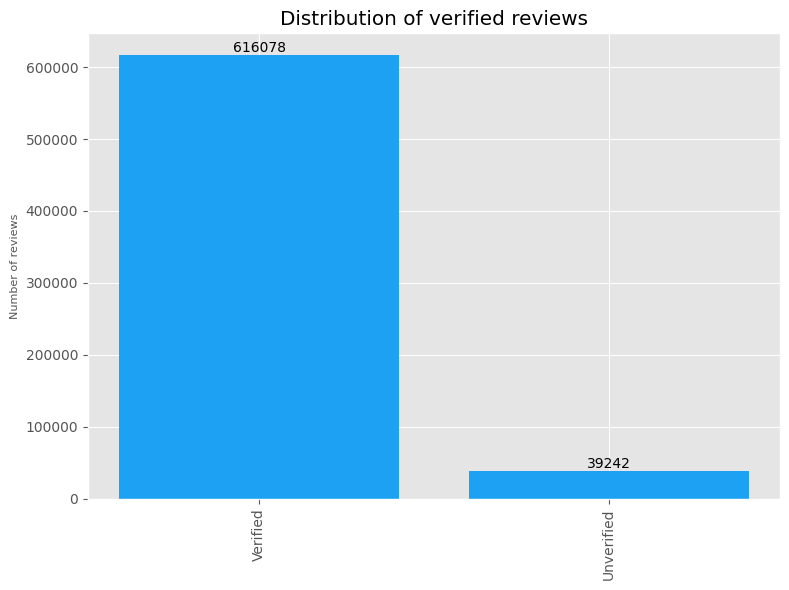

In [25]:
# Frequency distribution of Verified reviews
import matplotlib.pyplot as plt

# frequency distribution code
verified = reviews2['verified'].value_counts()
verified = verified.rename_axis('verified').reset_index(name='count')
verified['verified'] = verified['verified'].astype('category')

# Replacing the True and False values with the strings Verified and Unverified, respectively
verified['verified'] = verified['verified'].replace({True: 'Verified', False: 'Unverified'})


# Sorting the verified category by count in descending order
verified = verified.sort_values(by='count', ascending=False)

# Create the bar chart
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.style.use('ggplot')
plt.bar(verified['verified'], verified['count'], color='#1DA1F2')

# Annotating the bar chart with counts
for i, count in enumerate(verified['count']):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.title('Distribution of verified reviews')
plt.ylabel('Number of reviews', fontsize=8)
#plt.xlabel('verified', fontsize=8)

# Display the chart
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure the labels fit within the figure
plt.show()

In [26]:
#Get number of reviews by week of day
weekday_count = pd.DataFrame(reviews2.sort_values('weekday_name', ascending = True).groupby(['weekday_name','weekday'])['reviewerid'].count().reset_index())
weekday_count.rename(columns={'reviewerid': 'Number of Reviews'}, inplace=True)
weekday_count = weekday_count.sort_values(['weekday_name'])
weekday_count

,weekday_name,weekday,Number of Reviews
0,Friday,4,84576
1,Monday,0,109561
2,Saturday,5,72098
3,Sunday,6,79925
4,Thursday,3,94809
5,Tuesday,1,107655
6,Wednesday,2,106696


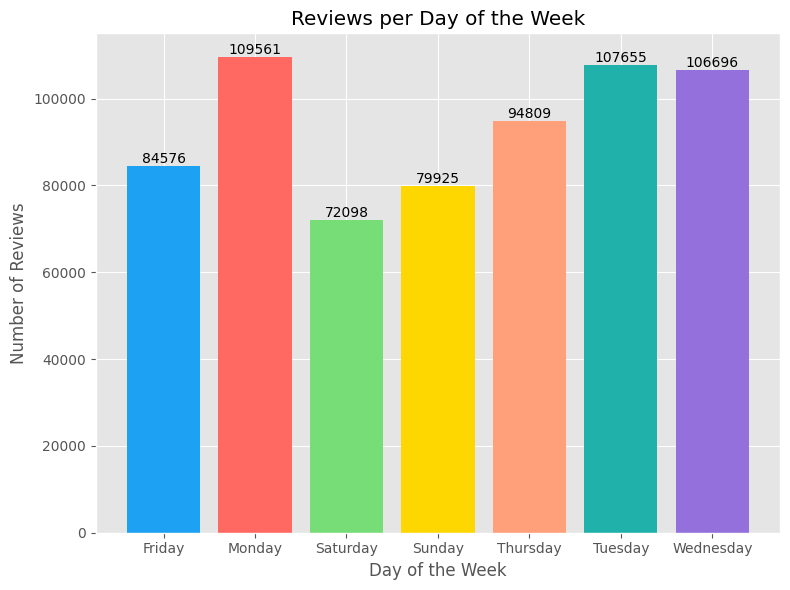

In [27]:
#Frequency distribution by day of week

x, y = weekday_count['weekday_name'], weekday_count['Number of Reviews']

# Define a color palette for the bars
colors = ['#1DA1F2', '#FF6961', '#77DD77', '#FFD700', '#FFA07A', '#20B2AA', '#9370DB']

# Create the bar chart with the defined colors
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.style.use('ggplot')
plt.bar(x, y, color=colors)

# Annotate the bar chart with counts
for i, count in enumerate(y):
    plt.text(i, count, count, ha='center', va='bottom', fontsize=10)

plt.title('Reviews per Day of the Week')
plt.ylabel('Number of Reviews', fontsize=12)
plt.xlabel('Day of the Week', fontsize=12)

# Display the chart
plt.tight_layout()  # Ensure the labels fit within the figure
plt.show()

In [28]:
#Number of Reviews per Month
import matplotlib.pyplot as plt

reviews2_new = pd.DataFrame(reviews2.groupby(['reviewtime'])['reviewerid'].count().reset_index())
reviews2_new.rename(columns={'reviewerid': 'Number of Reviews'}, inplace=True)
reviews2_new = reviews2_new.sort_values(['Number of Reviews'], ascending=False)
reviews2_new.head(15)



,reviewtime,Number of Reviews
3568,2016-01-15,2581
3662,2016-04-18,2479
4118,2017-07-18,1858
3750,2016-07-15,1527
3663,2016-04-19,1347
3677,2016-05-03,1214
3995,2017-03-17,1184
3615,2016-03-02,1132
3524,2015-12-02,1106
3753,2016-07-18,1069


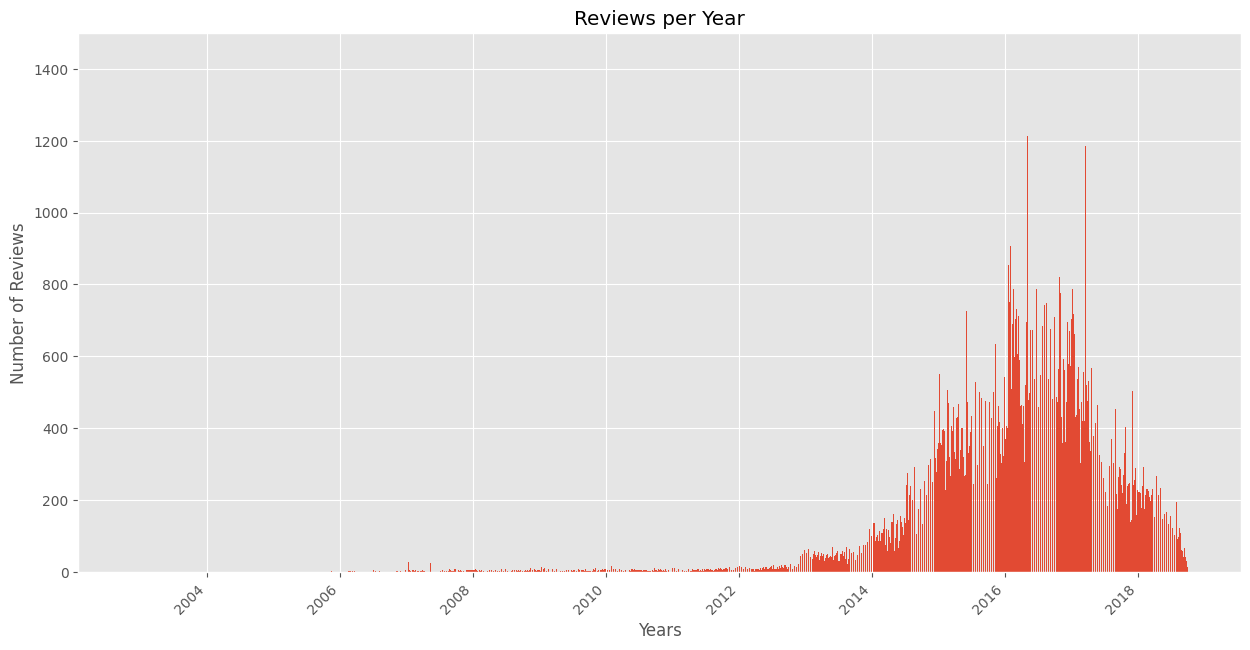

In [29]:
import matplotlib.pyplot as plt

# Create a DataFrame of the number of reviews per month
reviews2_new = pd.DataFrame(reviews2.groupby(['reviewtime'])['reviewerid'].count().reset_index())
reviews2_new.rename(columns={'reviewerid': 'Number of Reviews'}, inplace=True)
reviews2_new = reviews2_new.sort_values(['Number of Reviews'], ascending=False)
reviews2_new.head(15)

# Convert the 'reviewtime' column to datetime format
reviews2_new['reviewtime'] = pd.to_datetime(reviews2_new['reviewtime'])

# Create the bar chart
fig, ax = plt.subplots(figsize=(15, 7))
ax.bar(reviews2_new['reviewtime'], reviews2_new['Number of Reviews'])

# Shorten the y-axis so that it only goes up to 2500 reviews
ax.set_ylim(0, 1500)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set the plot title and labels
plt.style.use('ggplot')
plt.title('Reviews per Year')
plt.ylabel('Number of Reviews', fontsize=12)
plt.xlabel('Years', fontsize=12)

# Show the plot
plt.show()

In [30]:
rating = pd.DataFrame(reviews2.groupby(['overall'])['reviewerid'].count().reset_index())
rating.rename(columns={'reviewerid': 'Number of Reviews'}, inplace=True)
rating = rating.sort_values(['Number of Reviews'], ascending=False)
rating

,overall,Number of Reviews
4,5.0,342048
3,4.0,108685
0,1.0,84928
2,3.0,70676
1,2.0,48983


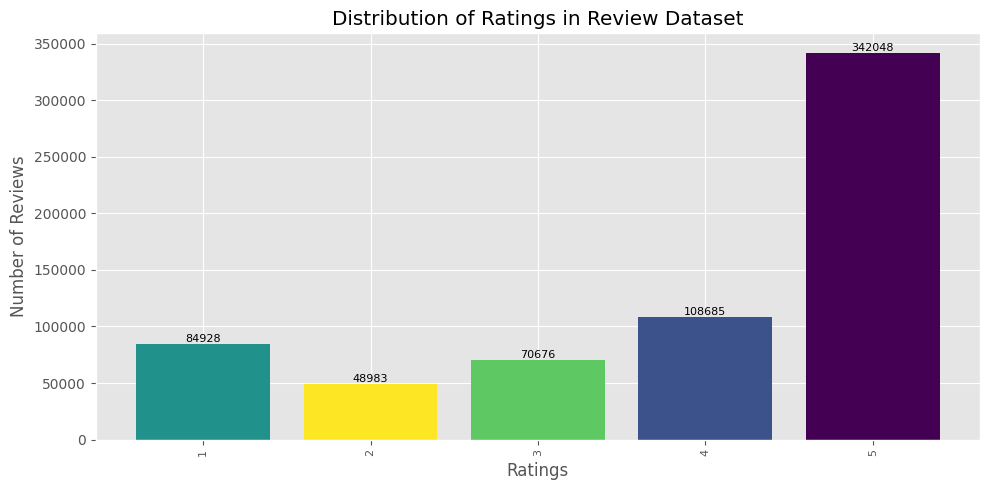

In [32]:
import numpy as np
# Frequency distribution of ratings
overall = reviews2['overall'].value_counts()
overall = overall.rename_axis('overall').reset_index(name='count')
overall['overall'] = overall['overall'].astype('category')

# Sorting the overall by count in descending order
overall = overall.sort_values(by='count', ascending=False)

# Convert 'overall' column to a numerical type
overall['overall'] = overall['overall'].astype(float)

# Generate a list of distinct colors for each bar
colors = plt.cm.viridis(np.linspace(0, 1, len(overall)))

# Create the bar chart with different colors
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
plt.style.use('ggplot')

# Create the bar chart with different colors
plt.bar(overall['overall'], overall['count'], color=colors)

# Get the center x-coordinate of each bar
x_centers = overall['overall']

# Annotate the bar chart with counts
for i, count in enumerate(overall['count']):
    plt.text(x_centers[i], count, str(count), ha='center', va='bottom', fontsize=8)

plt.title('Distribution of Ratings in Review Dataset')
plt.ylabel('Number of Reviews', fontsize=12)
plt.xlabel('Ratings', fontsize=12)

# Rotate the x-axis labels and reduce the font size
plt.xticks(rotation=90, fontsize=8)

# Ensure the labels fit within the figure
plt.tight_layout()

# Display the chart
plt.show()

In [33]:
reviews2

,overall,verified,reviewtime,reviewerid,asin,reviewername,reviewtext,summary,weekday,weekday_name,month,month_name,year,date,yearmonth,reviewerid_freq
0,5.0,True,2014-10-20,A1D4G1SNUZWQOT,7106116521,Tracy,Exactly what I needed.,perfect replacements!!,0,Monday,10,October,2014,2014-10-20,2014-10,1
2,4.0,False,2014-08-25,A2MWC41EW7XL15,7106116521,Kathleen,Love these... I am going to order another pack...,My New 'Friends' !!,0,Monday,8,August,2014,2014-08-25,2014-08,1
3,2.0,True,2014-08-24,A2UH2QQ275NV45,7106116521,Jodi Stoner,too tiny an opening,Two Stars,6,Sunday,8,August,2014,2014-08-24,2014-08,1
4,3.0,False,2014-07-27,A89F3LQADZBS5,7106116521,Alexander D.,Okay,Three Stars,6,Sunday,7,July,2014,2014-07-27,2014-07,1
6,4.0,True,2014-05-31,A7QS961ROI6E0,7106116521,REBECCA S LAYTON,These little plastic backs work great. No mor...,Works great!,5,Saturday,5,May,2014,2014-05-31,2014-05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883629,5.0,True,2017-03-13,AYJ9OR9SOSVL1,B01HJHTH5U,Amazon Customer,Love love love Iam 145 and 5'0 I got a large i...,A 5 star,0,Monday,3,March,2017,2017-03-13,2017-03,1
883631,5.0,True,2017-02-21,A1ZSB2Q144UTEY,B01HJHTH5U,Amazon Customer,I absolutely love this dress!! It's sexy and ...,I absolutely love this dress,1,Tuesday,2,February,2017,2017-02-21,2017-02,1
883632,5.0,True,2016-11-25,A2CCDV0J5VB6F2,B01HJHTH5U,Amazon Customer,I'm 5'6 175lbs. I'm on the tall side. I wear a...,I wear a large and ordered a large and it stil...,4,Friday,11,November,2016,2016-11-25,2016-11,1
883634,3.0,True,2016-11-10,A2HO94I89U3LNH,B01HJHF97K,Mgomez,"Too clear in the back, needs lining",Three Stars,3,Thursday,11,November,2016,2016-11-10,2016-11,1
